In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import folium as flm
import json 
from IPython.display import HTML

In [2]:
df = pd.read_csv("SaaS-Sales.csv")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [6]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [10]:
df.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [25]:
# Top Product 
top_products = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)
print(top_products.head(10))

Product
Alchemy                       55617.8249
Site Analytics                44515.7306
Data Smasher                  41936.6357
Support                       32864.4698
FinanceHub                    32136.4203
Marketing Suite - Gold        21278.8264
OneView                       18138.0054
SaaS Connector Pack           13059.1436
ContactMatcher                12496.2822
SaaS Connector Pack - Gold     6964.1767
Name: Profit, dtype: float64


In [ ]:
#Top Segments
top_segments = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print(top_segments)


Segment
SMB           134119.2092
Strategic      91979.1340
Enterprise     60298.6785
Name: Profit, dtype: float64


In [14]:
# Top Region
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions

Region
EMEA    1.043887e+06
AMER    8.378496e+05
APJ     4.154642e+05
Name: Sales, dtype: float64

region AMER memiliki penjualan tertinggi

In [16]:
# Top Countries
top_countries = df.groupby('Country')['Sales'].sum().astype(int).sort_values(ascending=False)
top_countries.head(5)

Country
United States     457687
United Kingdom    313169
Japan             170188
Canada            138641
France            116511
Name: Sales, dtype: int64

In [ ]:
# discount profit?
correlation = df[['Discount', 'Profit']].corr()
print(correlation)
# diskon dan profit tidak berkorelasi

          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


Kesimpulan, Diskon dan profit saling tidak berkorelasi.

In [41]:
# Konversi Order Date ke format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agregasi penjualan per bulan
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Tampilkan tren penjualan per bulan
print (monthly_sales)


Order Date
2020-01-31     13946.2290
2020-02-29      4810.5580
2020-03-31     55691.0090
2020-04-30     28295.3450
2020-05-31     23648.2870
2020-06-30     34595.1276
2020-07-31     33946.3930
2020-08-31     27909.4685
2020-09-30     81777.3508
2020-10-31     31453.3930
2020-11-30     78628.7167
2020-12-31     69545.6205
2021-01-31     18174.0756
2021-02-28     11951.4110
2021-03-31     38726.2520
2021-04-30     34195.2085
2021-05-31     30131.6865
2021-06-30     24797.2920
2021-07-31     28765.3250
2021-08-31     36898.3322
2021-09-30     64595.9180
2021-10-31     31404.9235
2021-11-30     75972.5635
2021-12-31     74919.5212
2022-01-31     18542.4910
2022-02-28     22867.7110
2022-03-31     51186.2170
2022-04-30     39248.5930
2022-05-31     56691.0770
2022-06-30     39430.4430
2022-07-31     38440.7550
2022-08-31     33265.5643
2022-09-30     72908.1089
2022-10-31     56463.1300
2022-11-30     82192.3228
2022-12-31     97237.4170
2023-01-31     44703.1420
2023-02-28     20283.5134
2

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4128\3086349705.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


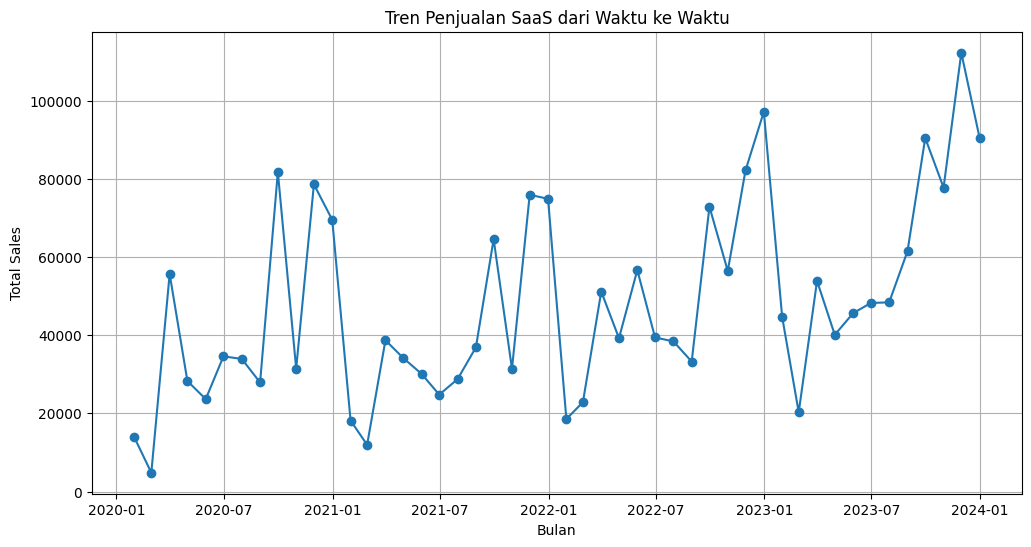

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Total Sales')
plt.title('Tren Penjualan SaaS dari Waktu ke Waktu')
plt.grid()
plt.show()


In [ ]:
df.isnull().sum() 


Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [56]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [25]:
df['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [35]:
total_sales = df['Sales'].sum()
top_regions = df.groupby('Region')['Sales'].sum()
region_percentage = (top_regions/total_sales)*100
region_percentage_dict = region_percentage.round(2).to_dict()


In [50]:
AMER_region = df[df['Region'] == 'AMER']['Country'].unique()
AMER_region 

array(['United States', 'Canada', 'Costa Rica', 'Brazil', 'Chile',
       'Colombia', 'Mexico', 'Argentina'], dtype=object)

In [51]:
EMEA_region = df[df['Region'] == 'EMEA']['Country'].unique()
EMEA_region

array(['Ireland', 'Germany', 'Sweden', 'Italy', 'Turkey', 'France',
       'Luxembourg', 'United Kingdom', 'Spain', 'South Africa',
       'Portugal', 'Belgium', 'Russia', 'Netherlands', 'Poland',
       'Czech Republic', 'Saudi Arabia', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'Austria', 'Egypt',
       'Denmark', 'Croatia', 'Qatar', 'Slovenia', 'Iceland'], dtype=object)

In [52]:
APJ_region = df[df['Region'] == 'APJ']['Country'].unique()
APJ_region 

array(['Japan', 'Australia', 'Philippines', 'India', 'Singapore',
       'New Zealand', 'South Korea', 'China', 'Indonesia', 'Taiwan'],
      dtype=object)

In [36]:
region_colors = {
    'EMEA': 'skyblue',
    'AMER': 'lightcoral',
    'APJ': 'lightgreen'
}

In [21]:
m = flm.Map(location=[0, 0], zoom_start=2)

In [ ]:
# fungsi warna dan region

# 1. Hitung Total Penjualan dan Persentase Penjualan per Region
total_sales = df['Sales'].sum()
top_regions = df.groupby('Region')['Sales'].sum()
region_percentage = (top_regions/total_sales)*100
region_percentage_dict = region_percentage.round(2).to_dict()

# 2. Tentukan Warna untuk Setiap Region
region_colors = {
    'EMEA': 'skyblue',
    'AMER': 'lightcoral',
    'APJ': 'lightgreen'
}

# 3. Path ke File GeoJSON (gunakan yang sesuai dengan kebutuhan Anda)
world_geojson_path = ('https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json')

# 4. Buat Peta Folium
m = flm.Map(location=[0, 0], zoom_start=2)

# 5. Fungsi Gaya (Style Function) untuk Mewarnai Region
def style_function(feature):
    country_name = feature['properties']['name']
    region = None

    # Pemetaan Negara ke Region (sesuaikan dengan data Anda)
    emea_countries = ['Ireland', 'Germany', 'Sweden', 'Italy', 'Turkey', 'France', 'Luxembourg', 'United Kingdom', 'Spain', 'South Africa', 'Portugal', 'Belgium', 'Russia', 'Netherlands', 'Poland', 'Czech Republic', 'Saudi Arabia', 'Finland', 'Israel', 'Norway', 'Ukraine', 'United Arab Emirates', 'Greece', 'Austria', 'Egypt', 'Denmark', 'Croatia', 'Qatar', 'Slovenia', 'Iceland']
    amer_countries = ['United States of America', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Costa Rica']
    apj_countries = ['Japan', 'Australia', 'Philippines', 'India', 'Singapore', 'New Zealand', 'South Korea', 'China', 'Indonesia', 'Taiwan']

    if country_name in emea_countries:
        region = 'EMEA'
    elif country_name in amer_countries:
        region = 'AMER'
    elif country_name in apj_countries:
        region = 'APJ'

    if region in region_colors:
        return {
            'fillColor': region_colors[region],
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7,
        }
    return {
        'fillColor': 'lightgray', # Warna default jika tidak cocok
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# 6. Fungsi untuk Tooltip
def on_each_feature(feature, layer):
    country_name = feature['properties']['name']
    region = None

    emea_countries = ['Ireland', 'Germany', 'Sweden', 'Italy', 'Turkey', 'France', 'Luxembourg', 'United Kingdom', 'Spain', 'South Africa', 'Portugal', 'Belgium', 'Russia', 'Netherlands', 'Poland', 'Czech Republic', 'Saudi Arabia', 'Finland', 'Israel', 'Norway', 'Ukraine', 'United Arab Emirates', 'Greece', 'Austria', 'Egypt', 'Denmark', 'Croatia', 'Qatar', 'Slovenia', 'Iceland']
    amer_countries = ['United States of America', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Costa Rica']
    apj_countries = ['Japan', 'Australia', 'Philippines', 'India', 'Singapore', 'New Zealand', 'South Korea', 'China', 'Indonesia', 'Taiwan']

    if country_name in emea_countries:
        region = 'EMEA'
    elif country_name in amer_countries:
        region = 'AMER'
    elif country_name in apj_countries:
        region = 'APJ'

    if region in region_percentage_dict:
        percentage = region_percentage_dict[region]
        layer.bindTooltip(f"Negara: {country_name}<br>Region: {region}<br>Persentase Penjualan: {percentage}%")
    else:
        layer.bindTooltip(f"Negara: {country_name}<br>Region: Tidak Diketahui")

# 7. Tambahkan Layer GeoJSON ke Peta
flm.GeoJson(
    world_geojson_path,
    style_function=style_function,
    on_each_feature=on_each_feature
).add_to(m)

# 8. Tampilkan Peta
m

TypeError: Object of type function is not JSON serializable